Augmented images saved in: Augmented Dataset


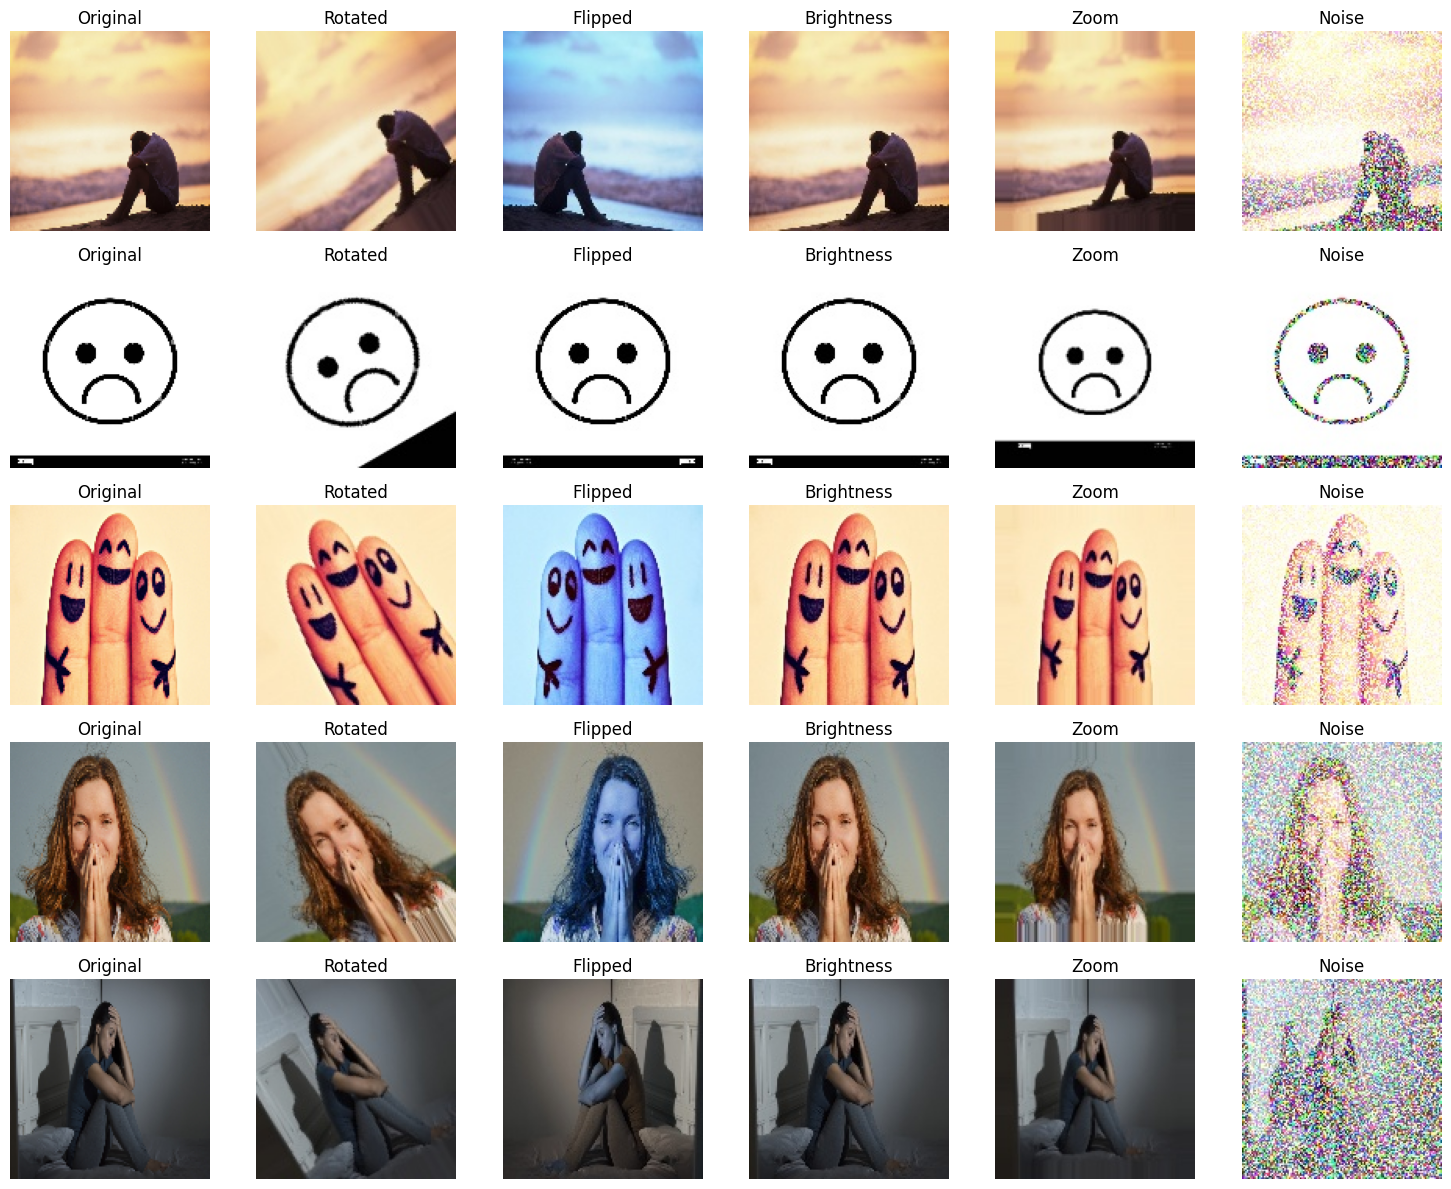

In [1]:
import os
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define dataset path 
DATASET_PATH = "Dataset"
AUGMENTED_PATH ="Augmented Dataset"

# Create folder if it doesn't exist
os.makedirs(AUGMENTED_PATH, exist_ok=True)

# List all images
all_images = []
for root, _, files in os.walk(DATASET_PATH):
    for file in files:
        if file.endswith(('.jpg', '.png', '.jpeg')):
            all_images.append(os.path.join(root, file))

# Randomly select 5 images for augmentation
random_images = random.sample(all_images, 5)

# Function to load images
def load_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
    img = cv2.resize(img, (128, 128))  # Resize for uniformity
    return img

# Define augmentation transformations using TensorFlow/Keras
data_gen = ImageDataGenerator(
    rotation_range=30,  # Rotation up to 30 degrees
    horizontal_flip=True,  # Flip horizontally
    brightness_range=[0.5, 1.5],  # Adjust brightness
    zoom_range=0.2  # Zoom in by 20%
)

def add_gaussian_noise(image):
    """Add random Gaussian noise to an image"""
    row, col, ch = image.shape
    mean = 0
    sigma = 25  # Standard deviation for noise
    gauss = np.random.normal(mean, sigma, (row, col, ch)).astype(np.uint8)
    noisy_image = cv2.add(image, gauss)
    return np.clip(noisy_image, 0, 255)  # Ensure pixel values remain valid

# Loop through selected images and apply augmentations
for image_path in random_images:
    # Load original image
    original_img = load_image(image_path)

    # Get image filename without extension
    image_name = os.path.basename(image_path).split('.')[0]

    # Apply augmentations and save images

    # Rotation
    rotated_img = data_gen.apply_transform(original_img, {"theta": 30})
    cv2.imwrite(os.path.join(AUGMENTED_PATH, f"{image_name}_rotated.jpg"), cv2.cvtColor(rotated_img.astype(np.uint8), cv2.COLOR_RGB2BGR))

    # Horizontal Flip
    flipped_img = cv2.flip(original_img, 1)
    cv2.imwrite(os.path.join(AUGMENTED_PATH, f"{image_name}_flipped.jpg"), flipped_img)

    # Brightness Adjustment
    brightness_img = data_gen.apply_transform(original_img, {"brightness_range": [0.5, 1.5]})  # Corrected brightness adjustment
    cv2.imwrite(os.path.join(AUGMENTED_PATH, f"{image_name}_brightness.jpg"), cv2.cvtColor(brightness_img.astype(np.uint8), cv2.COLOR_RGB2BGR))

    # Zoom
    zoom_img = data_gen.apply_transform(original_img, {"zx": 1.2, "zy": 1.2})
    cv2.imwrite(os.path.join(AUGMENTED_PATH, f"{image_name}_zoom.jpg"), cv2.cvtColor(zoom_img.astype(np.uint8), cv2.COLOR_RGB2BGR))

    # Gaussian Noise
    noisy_img = add_gaussian_noise(original_img)
    cv2.imwrite(os.path.join(AUGMENTED_PATH, f"{image_name}_noise.jpg"), cv2.cvtColor(noisy_img.astype(np.uint8), cv2.COLOR_RGB2BGR))

print(f"Augmented images saved in: {AUGMENTED_PATH}")

# Plot original and augmented images
fig, axes = plt.subplots(5, 6, figsize=(15, 12))
axes = axes.flatten()

for idx, image_path in enumerate(random_images):
    # Load original image
    original_img = load_image(image_path)
    
    # Load augmented versions
    image_name = os.path.basename(image_path).split('.')[0]
    augmented_images = [
        cv2.imread(os.path.join(AUGMENTED_PATH, f"{image_name}_rotated.jpg")),
        cv2.imread(os.path.join(AUGMENTED_PATH, f"{image_name}_flipped.jpg")),
        cv2.imread(os.path.join(AUGMENTED_PATH, f"{image_name}_brightness.jpg")),
        cv2.imread(os.path.join(AUGMENTED_PATH, f"{image_name}_zoom.jpg")),
        cv2.imread(os.path.join(AUGMENTED_PATH, f"{image_name}_noise.jpg")),
    ]
    
    # Convert images from BGR to RGB
    augmented_images = [cv2.cvtColor(img, cv2.COLOR_BGR2RGB) for img in augmented_images]
    
    # Plot original image
    axes[idx * 6].imshow(original_img)
    axes[idx * 6].set_title("Original")
    
    # Plot augmented images
    titles = ["Rotated", "Flipped", "Brightness", "Zoom", "Noise"]
    for j, aug_img in enumerate(augmented_images):
        axes[idx * 6 + j + 1].imshow(aug_img.astype(np.uint8))
        axes[idx * 6 + j + 1].set_title(titles[j])

# Hide axes
for ax in axes:
    ax.axis("off")

plt.tight_layout()
plt.show()